# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Your code here.
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

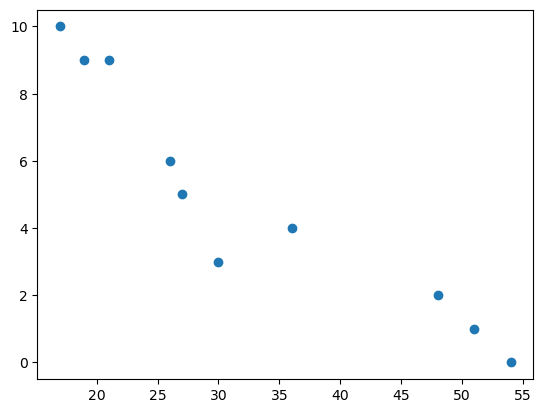

In [9]:
# Your code here.
plt.scatter(student_data['X'], student_data['Y'])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#Although N = small, the scatter plot shows that the higher amount of tardles occur within younger people. Same for the older people, they have the lowest amount of tardles. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
#correlation:
correlation = student_data['X'].corr(student_data['Y'])

#covariance:
covariance = student_data['X'].cov(student_data['Y'])

print(f"Corr: {correlation} and Cov: {covariance}")


Corr: -0.9391626886887122 and Cov: -45.56666666666667


In [13]:
#Negative correlation means a negative lineair relationship. Strong because -0.9 is quite high.
#Negative covariance just tells us its a negative relationship between the two variables, so if one goes up, the other goes down and visa versa. It doesnt tell us anything about the strength of this connection. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here.
from sklearn.linear_model import LinearRegression

X = student_data[['X']]
Y = student_data['Y']
model = LinearRegression()

result = model.fit(X, Y)



LinearRegression()


Plot your regression model on your scatter plot.

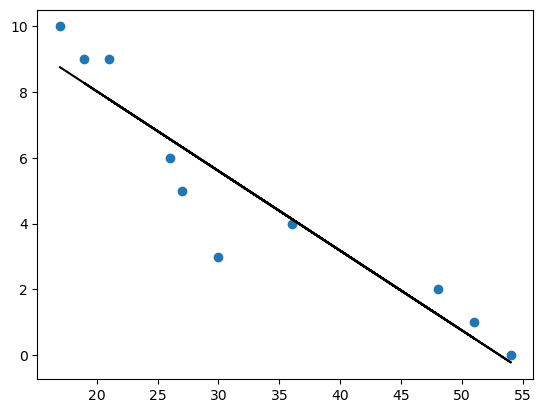

In [28]:
# Your code here.
plt.scatter(X, Y)
plt.plot(X, model.predict(X), color='black')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#According to the model you can clearly see a negative lineair relationship between age and tardiness. But we also know that the sample size is 10, which is too low to generalize this to a bigger population. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [33]:
# Your response here; we want a matrix here
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

correlation_matrix = vehicles[variables].corrwith(vehicles['CO2 Emission Grams/Mile'])
print(correlation_matrix)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64


In [ ]:
#Its looks like theres 3 strong correlations; fuels/barellsyear, combines MPG (negative) and fuel cost/year. 
#Theres 1 weak negative correlation, year. So we should ignore this one <- Least helpful
#The medium correlation is the one witht he cylinders, which correlates.
#The most important ones will be the 3 strong ones. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Your response here. 
variables2 = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
emissions = vehicles[variables2]


In [38]:
emissions.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
emissions.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [41]:
# Your response here. 
X = emissions.drop('CO2 Emission Grams/Mile', axis=1)
y = emissions['CO2 Emission Grams/Mile']


In [46]:
model = linear_model.LinearRegression()
result = model.fit(X, y)

In [47]:
result.score(X, y)

0.9808734920269122

In [48]:
#very strong model

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [49]:
# Your code here.
parties = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

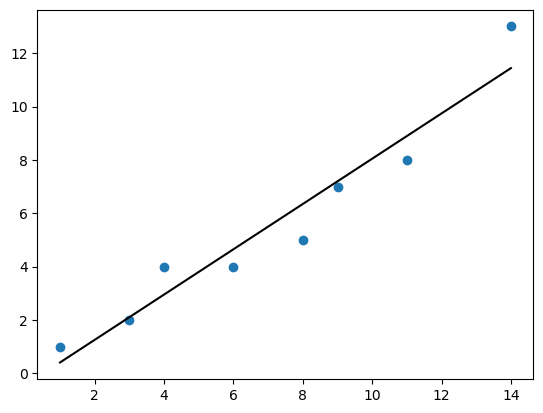

In [54]:
# Your code here.
X = parties[['X']]
Y = parties['Y']
model = LinearRegression()
result = model.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, model.predict(X), color='black')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [57]:
print('Intercept:', model.intercept_)
print('Coefficientt:', model.coef_)

Intercept: -0.43939393939393767
Coefficientt: [0.84848485]


In [58]:
#There seems to be positive lineair relationship between amount of invited people and amount of attended people. 
#The intercept is not really interesting here. 

#Coefficient is tho, because with a coef of 0,84, this means that if X increases by 1, Y increases by 0.84. 
#So for every person invited, 0,84 people will show up. So yes, based on this data. The more invited, the lower
#the total amount of % invited people showing up at the party. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [60]:
parties.head(20)

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [61]:
cleaned_parties = parties.drop(7)

In [62]:
cleaned_parties.head(20)

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


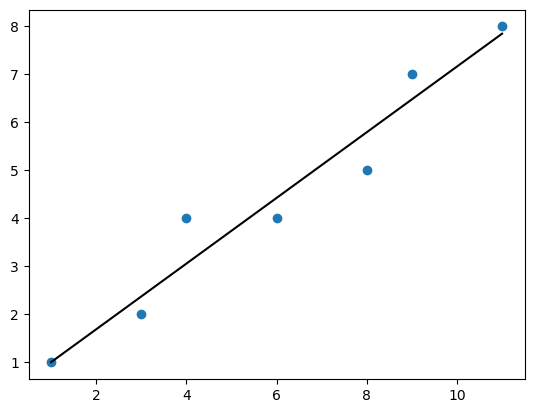

In [63]:
X = cleaned_parties[['X']]
Y = cleaned_parties['Y']
model = LinearRegression()
result = model.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, model.predict(X), color='black')
plt.show()

In [64]:
print('Intercept:', model.intercept_)
print('Coefficientt:', model.coef_)


Intercept: 0.32330827067669166
Coefficientt: [0.68421053]


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [65]:
#I would say the sample size is way too small in both cases, so removes more than 10% of the values is never a good
#idea but yea still we did it. Now we see the prediction of the host of the parties is even stronger.

#because now; for every 1 person more invited, only 0,68 person will actually show up.
#also the intercept changed from negative to positive. Meaning that when x = 0, now y will be 0,32. Whcih is weird
#because if  you invite 1 people, 0,32 will show up. 